In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import scipy
from scipy import stats

import pylab as pl

import seaborn as sns

import sklearn

<h2>Raw Data</h2> It contains nonverbal features, gender feature, and personality scores.

In [3]:
data = pd.read_csv("nvgd_raw.csv")
data.head()

,vlogId,mean.pitch,sd.pitch,mean.conf.pitch,sd.conf.pitch,mean.spec.entropy,sd.spec.entropy,mean.val.apeak,sd.val.apeak,mean.loc.apeak,...,hogv.entropy,hogv.median,hogv.cogR,hogv.cogC,gender,Extr,Agr,Cons,Emot,Open
0,VLOG1,178.15,0.38358,1.2526,0.45440,3.3674,0.29309,0.82192,0.12429,0.018525,...,7.026606,0.147870,121,198,1,4.9,3.7,3.6,3.2,5.5
1,VLOG3,239.32,0.36474,1.2205,0.41543,3.8150,0.17479,0.64969,0.22731,0.027022,...,4.006787,0.008571,175,164,2,5.0,5.0,4.6,5.3,4.4
2,VLOG5,173.50,0.47636,1.1678,0.50508,3.6949,0.32347,0.65878,0.22253,0.021466,...,7.016616,0.574790,117,156,1,5.9,5.3,5.3,5.8,5.5
3,VLOG6,201.28,0.27454,1.4996,0.40633,3.8767,0.22874,0.67715,0.17994,0.029500,...,3.465855,0.008744,108,179,1,5.4,4.8,4.4,4.8,5.7
4,VLOG7,275.68,0.48758,1.0312,0.42298,3.6332,0.52273,0.45095,0.28455,0.017109,...,7.160260,0.285714,135,156,1,4.7,5.1,4.4,5.1,4.7


<h2>Correlation Analysis</h2> We will pick the features with p-value <=0.05. 

In [16]:
feature=[]
for i in range(1,27):
    cx = data.columns[i]
    x = data[cx]
    for j in range(27,32):
        cy = data.columns[j]
        y = data[cy]
        if scipy.stats.pearsonr(x,y)[1]<=0.05:
            print(data.columns.values[i],":",data.columns.values[j],scipy.stats.pearsonr(x,y))
            feature.append(i)
            
cfeature=list(set(feature))
print("Correlated features:",cfeature)

mean.pitch : Extr (0.15464917406482401, 0.0018235831663052965)
mean.pitch : Cons (-0.12974216073674791, 0.0090344327616359767)
sd.pitch : Extr (-0.10644227050772209, 0.032442638706612133)
sd.pitch : Agr (-0.14042746581827142, 0.0046863719108528774)
mean.conf.pitch : Extr (0.20813730036965297, 2.4777687619585183e-05)
sd.conf.pitch : Extr (0.17078447112564721, 0.00056590530318694084)
mean.spec.entropy : Extr (0.13463448064581257, 0.0067266190362222939)
mean.spec.entropy : Agr (-0.10117221973163691, 0.042107793061322348)
mean.loc.apeak : Extr (0.20848233326875595, 2.4004345594483501e-05)
mean.num.apeak : Extr (0.13505558758419292, 0.0065551139380208021)
mean.energy : Extr (0.12503228894767693, 0.011896203015104115)
sd.d.energy : Extr (0.20163479365225168, 4.4600616473347834e-05)
time.speaking : Extr (0.16361299990054565, 0.0009645782454197672)
time.speaking : Cons (0.21198628725202995, 1.7343909239608612e-05)
num.turns : Extr (-0.11031569988177438, 0.026608131975068235)
hogv.entropy : Ext

<h2>Cumulative Percentage</h2>

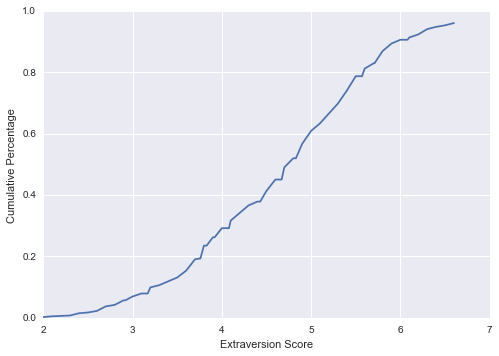

In [28]:
agr = sorted(data["Extr"])
per = []
fre = []
d_extr=[]
litem=0
for item in extr:
    item=float("{0:.2f}".format(item))
    if item!=litem:
        per.append(agr.count(item)/len(extr))
        fre.append(agr.count(item))
        d_extr.append(item)
    litem=item
    
#calculate the cumulative sum 
y = np.cumsum(per,dtype=float)

plt.plot(d_extr,y)
plt.xlabel("Extraversion Score")
plt.ylabel("Cumulative Percentage")
plt.show()

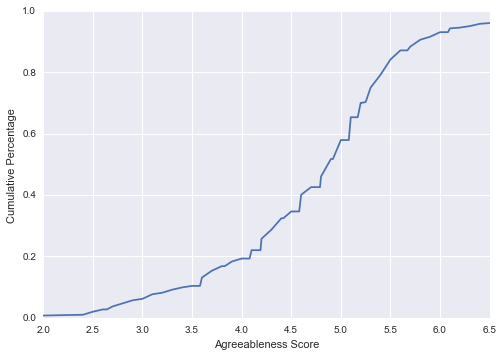

In [29]:
agr = sorted(data["Agr"])
per = []
fre = []
d_agr=[]
litem=0
for item in agr:
    item=float("{0:.2f}".format(item))
    if item!=litem:
        per.append(agr.count(item)/len(agr))
        fre.append(agr.count(item))
        d_agr.append(item)
    litem=item
    
#calculate the cumulative sum 
y = np.cumsum(per,dtype=float)

plt.plot(d_agr,y)
plt.xlabel("Agreeableness Score")
plt.ylabel("Cumulative Percentage")
plt.show()

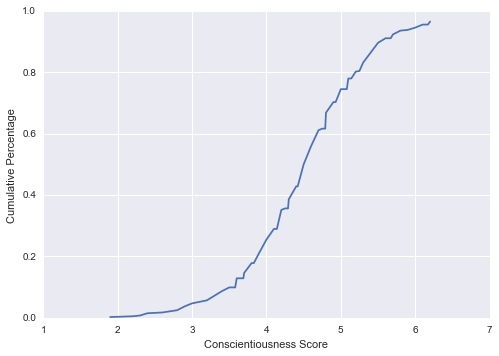

In [30]:
con = sorted(data["Cons"])
per = []
fre = []
d_con=[]
litem=0
for item in con:
    item=float("{0:.2f}".format(item))
    if item!=litem:
        per.append(con.count(item)/len(con))
        fre.append(con.count(item))
        d_con.append(item)
    litem=item
    
#calculate the cumulative sum 
y = np.cumsum(per,dtype=float)

plt.plot(d_con,y)
plt.xlabel("Conscientiousness Score")
plt.ylabel("Cumulative Percentage")
plt.show()

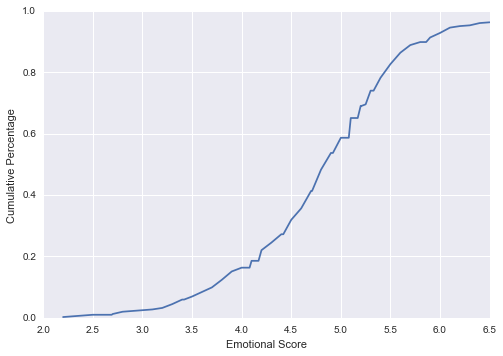

In [31]:
emot = sorted(data["Emot"])
per = []
fre = []
d_emot=[]
litem=0
for item in emot:
    item=float("{0:.2f}".format(item))
    if item!=litem:
        per.append(emot.count(item)/len(emot))
        fre.append(emot.count(item))
        d_emot.append(item)
    litem=item
    
#calculate the cumulative sum 
y = np.cumsum(per,dtype=float)

plt.plot(d_emot,y)
plt.xlabel("Emotional Score")
plt.ylabel("Cumulative Percentage")
plt.show()

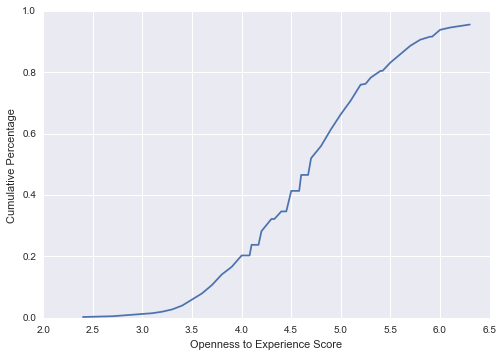

In [32]:
Open = sorted(data["Open"])
per = []
fre = []
d_Open=[]
litem=0
for item in Open:
    item=float("{0:.2f}".format(item))
    if item!=litem:
        per.append(Open.count(item)/len(Open))
        fre.append(Open.count(item))
        d_Open.append(item)
    litem=item
    
#calculate the cumulative sum 
y = np.cumsum(per,dtype=float)

plt.plot(d_Open,y)
plt.xlabel("Openness to Experience Score")
plt.ylabel("Cumulative Percentage")
plt.show()

These plots show the cumulative percentage of different extraversion personality score from 1 to 7. We can see that the cumulation is slow at the begining and the end, that means the percentages of people getting extreme scores are low. It make sense that most of the people have a relatively moderate socre.

<h2>Histogram</h2> One is plotted by frequency, the other one is plotted by value with curve.

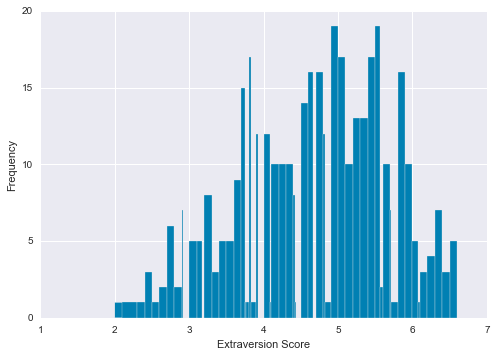

In [33]:
plt.hist(extr,d_extr,color=[0,0.5,0.7])
plt.xlim(1, 7)
plt.xlabel("Extraversion Score")
plt.ylabel("Frequency")
plt.show()

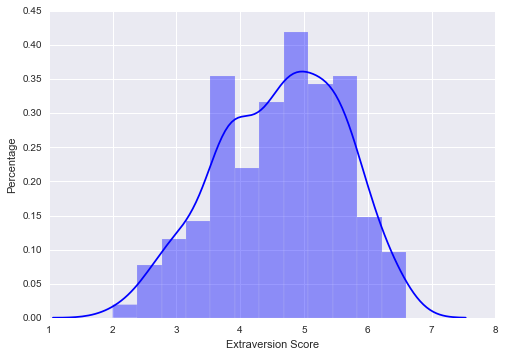

In [34]:
sns.distplot(data["Extr"],color='b')
plt.xlabel("Extraversion Score")
plt.ylabel("Percentage")

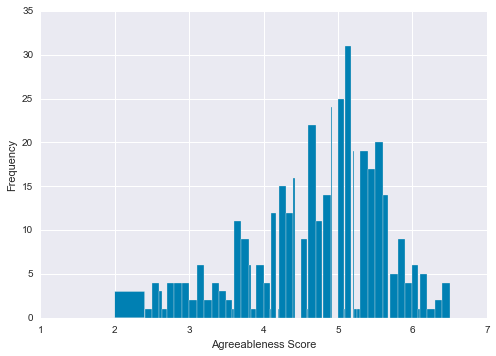

In [35]:
plt.hist(agr,d_agr,color=[0,0.5,0.7])
plt.xlim(1, 7)
plt.xlabel("Agreeableness Score")
plt.ylabel("Frequency")
plt.show()

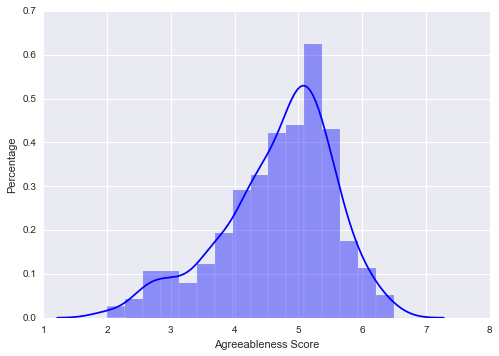

In [36]:
sns.distplot(data["Agr"],color='b')
plt.xlabel("Agreeableness Score")
plt.ylabel("Percentage")

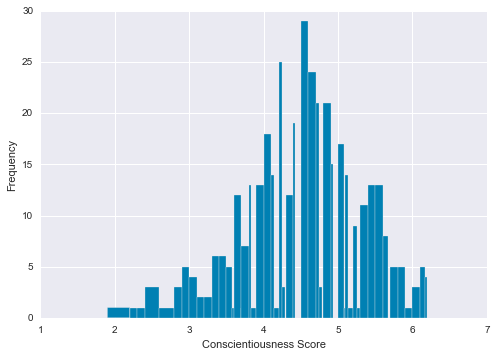

In [37]:
plt.hist(con,d_con,color=[0,0.5,0.7])
plt.xlim(1, 7)
plt.xlabel("Conscientiousness Score")
plt.ylabel("Frequency")
plt.show()

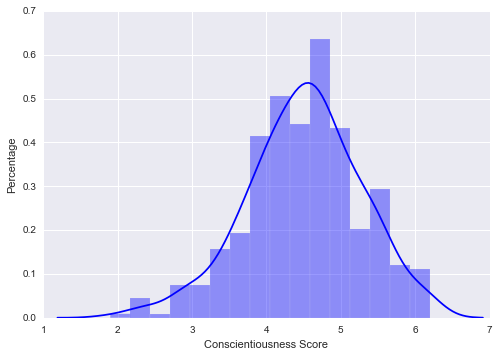

In [38]:
sns.distplot(data["Cons"],color='b')
plt.xlabel("Conscientiousness Score")
plt.ylabel("Percentage")

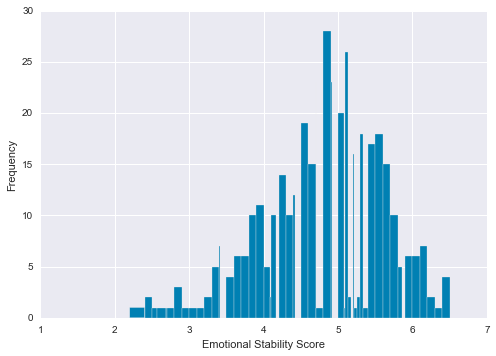

In [39]:
plt.hist(emot,d_emot,color=[0,0.5,0.7])
plt.xlim(1, 7)
plt.xlabel("Emotional Stability Score")
plt.ylabel("Frequency")
plt.show()

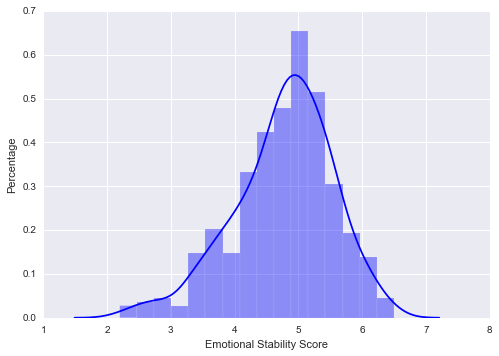

In [40]:
sns.distplot(data["Emot"],color='b')
plt.xlabel("Emotional Stability Score")
plt.ylabel("Percentage")

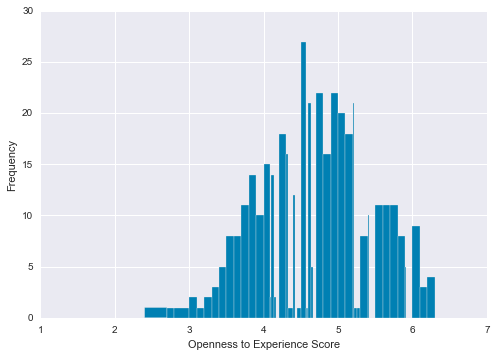

In [41]:
plt.hist(Open,d_Open,color=[0,0.5,0.7])
plt.xlim(1, 7)
plt.xlabel("Openness to Experience Score")
plt.ylabel("Frequency")
plt.show()

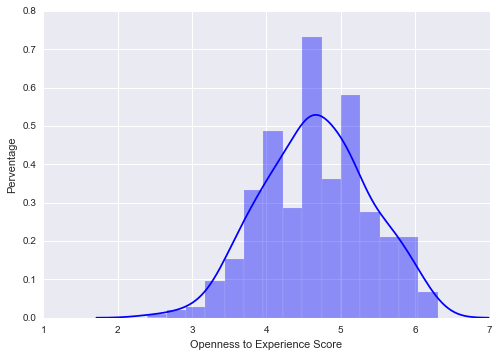

In [42]:
sns.distplot(data["Open"],color='b')
plt.xlabel("Openness to Experience Score")
plt.ylabel("Perventage")

<h2>Raw Data After Labels Classdified</h2>

In [10]:
data = pd.read_csv("nvgd_raw_3c.csv")
data.head()

,vlogId,mean.pitch,sd.pitch,mean.conf.pitch,sd.conf.pitch,mean.spec.entropy,sd.spec.entropy,mean.val.apeak,sd.val.apeak,mean.loc.apeak,...,hogv.entropy,hogv.median,hogv.cogR,hogv.cogC,gender,Extr,Agr,Cons,Emot,Open
0,VLOG1,178.15,0.38358,1.2526,0.45440,3.3674,0.29309,0.82192,0.12429,0.018525,...,7.026606,0.147870,121,198,1,2,1,1,1,3
1,VLOG3,239.32,0.36474,1.2205,0.41543,3.8150,0.17479,0.64969,0.22731,0.027022,...,4.006787,0.008571,175,164,2,2,2,2,3,2
2,VLOG5,173.50,0.47636,1.1678,0.50508,3.6949,0.32347,0.65878,0.22253,0.021466,...,7.016616,0.574790,117,156,1,3,3,3,3,3
3,VLOG6,201.28,0.27454,1.4996,0.40633,3.8767,0.22874,0.67715,0.17994,0.029500,...,3.465855,0.008744,108,179,1,3,2,2,2,3
4,VLOG7,275.68,0.48758,1.0312,0.42298,3.6332,0.52273,0.45095,0.28455,0.017109,...,7.160260,0.285714,135,156,1,2,2,2,2,2


<h2>2-Dimension Cluster</h2>

Reduced dataset shape: (404, 2)


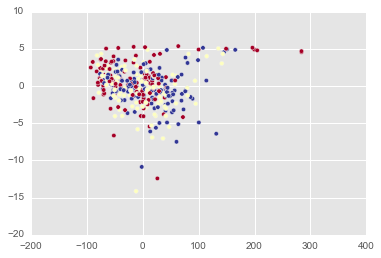

In [11]:
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA

X = data[cfeature]
y = data[["Extr"]]

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')

Reduced dataset shape: (404, 2)


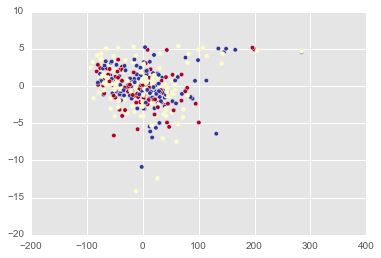

In [12]:
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA

X = data[cfeature]
y = data[["Agr"]]

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')

Reduced dataset shape: (404, 2)


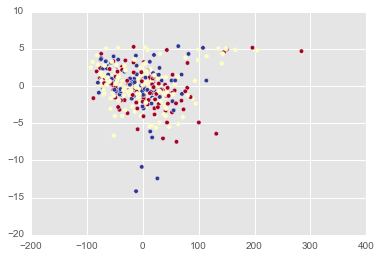

In [13]:
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA

X = data[cfeature]
y = data[["Cons"]]

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')

Reduced dataset shape: (404, 2)


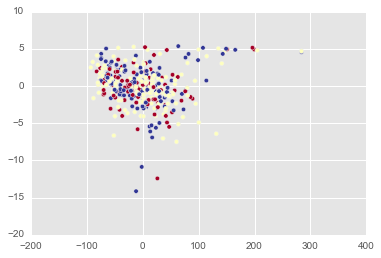

In [14]:
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA

X = data[cfeature]
y = data[["Emot"]]

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')

Reduced dataset shape: (404, 2)


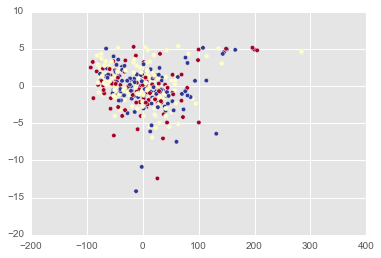

In [15]:
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA

X = data[cfeature]
y = data[["Open"]]

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')